# Trip Distribution with Python
Note, our NTHS data set is not appropriate for trip distribution analysis because this data covers the entire U.S.. However, for the purpose of this course we will use this trip data ignoring the fact that they are georgraphically distrubuted. To enable trip distribution process, we need to create a synthetic data on **origin and destination zones** and **distance** between all zones. Let's assume that these trips are resulted from data collection accros some metropolitan area consisting of **10 zones (0 to 9)**. 
- First, let's create random distances between each pair of zone
- Then assign origin and destination to each trip (two additional columns) distributed proportionally to distance between each zone. 

That will be our current trip distribution table. 

For the future trip disribution table we need **future trip count** that we supposed to obtain from the trip generation step by using, for example, cross-classificaiton method. We will also similate this data for the purpose of this assignment.

Please, keep in mind, that all data simulation steps are instrumental to perform trip distribution analysis and **should not be done in real-world application**. You will use existing data and output of trip egneration step instead. 

## python-tdm

Python modules for typical travel demand modeling calculations

Contributors: Chetan Joshi, Portland OR

Requires: Python with standard modules and numpy

Tested With: Data from DVRPC and Waterloo demand models

License: The MIT License (MIT)

License URI: https://opensource.org/licenses/MIT

2015

https://github.com/joshchea/python-tdm 




## Furness Method Python Implementation: Predictive Transportation Planning

Contributors: SadraDaneshvar

License: The MIT License (MIT)

2024

https://github.com/SadraDaneshvar/Furness_Method

## Gravity Model Python Implementation: Predictive Transportation Planning

Contributors: SadraDaneshvar

License: The MIT License (MIT)

2023

https://github.com/SadraDaneshvar/Gravity_Modelod

# Upload and Explore Data

In [48]:
import numpy as np  # Import numpy for numerical operations
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [49]:
#### This week we will use trip file, let's save file location path in a variable url, as usual
url = "tripv2pub.csv"

#### Read the .csv file using `pandas` libriary and store it as a `pandas` Data Frame called da
da = pd.read_csv(url)

#### Finally, let's make sure that all columns are displayed
pd.set_option('display.max_columns', None)

#### View newly created data frame da
da.head(3)

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,LOOP_TRIP,DWELTIME,PUBTRANS,TRIPPURP,WHYFROM,WHYTRP1S,TRVLCMIN,STRTTIME,ENDTIME,TRPHHVEH,VEHID,TRPTRANS,NUMONTRP,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,NONHHCNT,HHACCCNT,WHODROVE,DRVR_FLG,PSGR_FLG,WHODROVE_IMP,PARK2_PAMOUNT,PARK2_PAYTYPE,PARK2,WHYTO,WALK,TRPMILES,WTTRDFIN,WTTRDFIN5D,WTTRDFIN2D,TDCASEID,VMT_MILE,GASPRICE,WHYTRP90,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,R_AGE,R_SEX,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP,OBHUR,DBHUR,TRIPMODE,OTHTNRNT,OTPPOPDN,OTRESDN,OTEEMPDN,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,9000013002,1,1,1,900001300201,1,2,1,1,1,2,75,2,3,1,50,15,1435,1450,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,15,2,3.902424,1.608362e+06,0.0,1.569852e+06,90000130020101,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11,4,4,1,20,4,2,5,5,4,3,5,5,3,6,5,4,3
1,9000013002,1,2,2,900001300201,1,2,1,1,1,2,-9,2,3,15,1,10,1605,1615,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,1,1,3.902424,1.608362e+06,0.0,1.569852e+06,90000130020102,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11,4,4,1,5,5,3,6,5,4,3,20,4,2,5,5,4,3
2,9000013002,2,1,1,900001300202,1,-1,1,1,1,2,10,2,2,1,80,30,700,730,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,12,-1,17.077067,2.208973e+06,0.0,2.274239e+06,90000130020201,17.077067,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11,4,2,1,20,4,2,5,5,4,3,40,5,4,6,60,4,3


In [50]:
da.describe()

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,LOOP_TRIP,DWELTIME,PUBTRANS,TRIPPURP,WHYFROM,WHYTRP1S,TRVLCMIN,STRTTIME,ENDTIME,TRPHHVEH,VEHID,TRPTRANS,NUMONTRP,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,NONHHCNT,HHACCCNT,WHODROVE,DRVR_FLG,PSGR_FLG,WHODROVE_IMP,PARK2_PAMOUNT,PARK2_PAYTYPE,PARK2,WHYTO,WALK,TRPMILES,WTTRDFIN,WTTRDFIN5D,WTTRDFIN2D,TDCASEID,VMT_MILE,GASPRICE,WHYTRP90,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,R_AGE,R_SEX,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP,OBHUR,DBHUR,TRIPMODE,OTHTNRNT,OTPPOPDN,OTRESDN,OTEEMPDN,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
count,3.107400e+04,31074.000000,31074.000000,31074.000000,3.107400e+04,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.00000,31074.000000,31074.000000,3.107400e+04,3.107400e+04,3.107400e+04,3.107400e+04,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000,31074.000000
mean,9.000116e+09,1.681438,2.437826,2.435702,7.619426e+11,1.048529,1.141308,0.775407,1.722276,3.810066,1.988704,95.176611,1.989026,3.156723,7.185943,26.856311,24.547821,1329.818337,1363.067613,1.041063,1.076945,3.906159,1.997265,1.243644,1.129336,0.185267,-0.226427,-0.644236,-0.880543,-0.954464,-0.976830,-0.993338,-0.999710,0.414140,1.583124,3.333526,0.986774,1.423505,3.786606,-0.802894,-0.986677,82.358853,7.43390,-0.210272,13.965150,8.166137e+06,5.815804e+06,2.302368e+06,9.000116e+13,7.246071,397.951262,5.351805,2.058506,1.654921,1.775729,5.143046,2.652346,1.924117,1.993242,53.722565,7.260636,2.677029,2.821941,2.134453,5.812737,2.292109,3.530926,1.653086,4.137478,1.188968,202211.691543,1.303694,1029.494240,46.800830,1.430617,1.126504,0.855892,2.859014,1.916071,1.268198,4.716097,4.710755,1.503926,1.724657,7.415814,3.039454,3.037910,1.678735,31.759896,4.147133,3.174776,4.903842,31.755970,4.202259,3.226395,31.789985,4.148227,3.176450,4.906900,31.790886,4.200071,3.222533
std,5.829379e+04,0.999429,1.791504,1.789758,3.243517e+11,0.214885,1.341822,0.787571,0.447884,1.966057,0.105681,164.311604,0.104181,1.445374,6.851472,27.561324,46.483373,422.927312,425.447364,0.514696,1.094555,5.054558,3.477865,0.429287,0.982799,1.336076,1.215187,0.911104,0.563497,0.351382,0.254039,0.137048,0.029476,3.387813,0.891605,14.903745,0.833239,0.975625,15.956259,8.739298,0.207546,909.149169,6.99431,4.073497,85.416700,1.083988e+07,9.561997e+06,5.831630e+06,5.829379e+08,27.585135,68.455342,4.189875,0.761605,0.813206,0.417108,2.485935,1.011683,0.264816,0.794912,24.895858,2.861425,11.855930,1.446787,1.078400,3.251390,0.856474,1.552468,1.166259,1.665612,0.391490,20.136521,0.947416,4.982031,20.765643,0.931312,0.872042,0.646882,12.512009,0.277285,0.443029,2.409187,19.318665,0.499993,1.567172,2.445626,1.322290,1.3380

## Instrumental step I: Creating distance table

In [51]:
#### Set random seed for reproducibility here based on last 2 numbers of your UB ID
#### without the random seed, results will vary every time the program is run
np.random.seed(4) # Replace this seed number!!

#### Set the number of zones we are simulating
n_zones = 10

#### Create an empty DataFrame distdf that will contain distances bitween zones, size is n_zones*n_zones
distdf = pd.DataFrame(index = range(n_zones), columns = range(n_zones))

In [52]:
#### This cell utilises the programming structure called Function 
#### It is used to repeat similar actions with different inputs
#### It allows to make any repeated actions to be easier to read and execute

#### This function will calculate distance between two zones
#### To create more realistic data, distance will be based on zone number difference,
#### assuming that closer numbered zones are located phisically closer.

#### The following rules are applied:
#### if distance is calculated for within the zone trip, it should be from 1 to 3 miles
#### otherwise, distance should be larger for zones with numbers with larger differences 
#### distance between zone 2 and 5 should be larger than between 8 and 9.

#### This distance should be from 2 to ~15 miles.
#### Finally, distance from zone 2 to 3 and from 3 to 2, should be close or similar.

def calculate_distance(i, j): # i is row number and j is a column number in distance table
    if i == j:
        # Case for distance within the same zone (from 1.0 to 3.0 miles)
        # Here we are using a random function in a new way, specifically:
        # we requested to use uniform distribution between 0 and 3.
        # Note that we round the distance to get the number in the format 0.0 miles
        return round(np.random.uniform(1, 3), 1) # return is an output of the function we are constructing!
    else:
        # Case for distance between zones, influenced by the difference between zone numbers
        base_distance = np.random.uniform(2, n_zones)
        # Note the function abs()! What is it doing? Why we need it here?
        difference_factor = abs(i - j) * 1.2  # Larger difference will produce larger distance factor and, as result, distance.
        return round(base_distance + difference_factor, 1) # return is an output of the function we are constructing!


In [53]:
#### Now it is time to fill in the dist DataFrame with distances that we will calculate using function defined above
#### We will use familiar for-loop construct for that
for k in range(n_zones): # Repeat for each row
    for m in range(n_zones): # Repeat for each column
        if k <= m:
            distdf.iloc[k, m] = calculate_distance(k, m) # Here we call function 'calculate_distance' and provide it with i and j values
        else:
            distdf.iloc[k, m] = distdf.iloc[m, k]  # With this line we reduce number of calculations and make distances symmetrical

#### Here we assert the data type for distances, just in case
distdf = distdf.astype(float)

#### Let's see the resulted distance data frame!
print(distdf)

      0     1     2     3     4     5     6     7     8     9
0   2.9   7.6  12.2  11.3  12.4   9.7  17.0  10.4  13.6  16.3
1   7.6   2.6   4.8  11.3  13.5   8.1  12.8   9.3  13.5  12.0
2  12.2   4.8   2.9   6.7  12.0  11.9  13.7   9.4   9.8  15.2
3  11.3  11.3   6.7   1.3   9.1   7.7   9.8  14.3  12.2  10.1
4  12.4  13.5  12.0   9.1   1.3   7.6   8.6  10.7  10.0  13.2
5   9.7   8.1  11.9   7.7   7.6   1.8   8.2  10.5   7.0   9.8
6  17.0  12.8  13.7   9.8   8.6   8.2   2.0   8.7   6.4  10.0
7  10.4   9.3   9.4  14.3  10.7  10.5   8.7   2.2  10.4   7.3
8  13.6  13.5   9.8  12.2  10.0   7.0   6.4  10.4   2.3   4.7
9  16.3  12.0  15.2  10.1  13.2   9.8  10.0   7.3   4.7   2.0


## Instrumental step II: Creating additional columns with origin / destination zonal information

In [54]:
#### This function will generate pairs of numbers 
#### Pair is set to appear more frequently if zones are closer to each other
def generate_close_numbers():
    # We ask python to generate the zone number randomly
    num1 = np.random.randint(0, n_zones)
    alpha = np.random.randint(0,  n_zones)
    # For the second number we changed probabilities based on first number value
    # Different approaches can be applied to create more close pairs!
    if num1 > 4:
        if alpha < 7:
            num2 = np.random.randint(4,  n_zones)
        else:
            num2 = np.random.randint(0,  n_zones)
    elif num1 > 7:
        if alpha < 8:
            num2 = np.random.randint(6,  n_zones)
        else:
            num2 = np.random.randint(0,  n_zones)
    else:
        if alpha < 5:
            num2 = np.random.randint(1, 6)
        else:
            num2 = np.random.randint(0,  n_zones)
    return num1, num2 # This is a nessesary component of def function that disctates the output, in this case it is 2 numbers!

In [55]:
#### Create a dictionary with two entries that will be our futurre new columns
new_columns = {'Orig_Zone': [], 'Dest_Zone': []}

for i in range(da.shape[0]):
    num1, num2 = generate_close_numbers()
    new_columns['Orig_Zone'].append(num1)
    new_columns['Dest_Zone'].append(num2)

#### Add the new columns to the original DataFrame da
da['Orig_Zone'] = new_columns['Orig_Zone']
da['Dest_Zone'] = new_columns['Dest_Zone']

#### Let's see the result in the original DataFrame
da

,HOUSEID,PERSONID,TRIPID,SEQ_TRIPID,VEHCASEID,FRSTHM,PARK,HHMEMDRV,TDWKND,TRAVDAY,LOOP_TRIP,DWELTIME,PUBTRANS,TRIPPURP,WHYFROM,WHYTRP1S,TRVLCMIN,STRTTIME,ENDTIME,TRPHHVEH,VEHID,TRPTRANS,NUMONTRP,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,NONHHCNT,HHACCCNT,WHODROVE,DRVR_FLG,PSGR_FLG,WHODROVE_IMP,PARK2_PAMOUNT,PARK2_PAYTYPE,PARK2,WHYTO,WALK,TRPMILES,WTTRDFIN,WTTRDFIN5D,WTTRDFIN2D,TDCASEID,VMT_MILE,GASPRICE,WHYTRP90,NUMADLT,HOMEOWN,RAIL,CENSUS_D,CENSUS_R,HH_HISP,DRVRCNT,CDIVMSAR,HHFAMINC,HH_RACE,HHSIZE,HHVEHCNT,LIF_CYC,MSACAT,MSASIZE,URBAN,URBANSIZE,URBRUR,TDAYDATE,WRKCOUNT,STRATUMID,R_AGE,R_SEX,WORKER,DRIVER,R_RACE,R_HISP,PROXY,EDUC,PRMACT,R_SEX_IMP,VEHTYPE,HHFAMINC_IMP,OBHUR,DBHUR,TRIPMODE,OTHTNRNT,OTPPOPDN,OTRESDN,OTEEMPDN,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN,Orig_Zone,Dest_Zone
0,9000013002,1,1,1,900001300201,1,2,1,1,1,2,75,2,3,1,50,15,1435,1450,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,15,2,3.902424,1.608362e+06,0.000000e+00,1.569852e+06,90000130020101,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11,4,4,1,20,4,2,5,5,4,3,5,5,3,6,5,4,3,7,8
1,9000013002,1,2,2,900001300201,1,2,1,1,1,2,-9,2,3,15,1,10,1605,1615,1,1,3,2,1,2,2,1,-1,-1,-1,-1,-1,-1,0,2,1,1,2,1,-1.0,-1,-1,1,1,3.902424,1.608362e+06,0.000000e+00,1.569852e+06,90000130020102,3.902424,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,39,2,2,1,1,2,1,7,3,2,3,11,4,4,1,5,5,3,6,5,4,3,20,4,2,5,5,4,3,6,4
2,9000013002,2,1,1,900001300202,1,-1,1,1,1,2,10,2,2,1,80,30,700,730,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,12,-1,17.077067,2.208973e+06,0.000000e+00,2.274239e+06,90000130020201,17.077067,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11,4,2,1,20,4,2,5,5,4,3,40,5,4,6,60,4,3,8,5
3,9000013002,2,2,2,900001300202,1,-1,1,1,1,2,10,2,5,12,80,10,740,750,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,12,-9,4.748291,2.208973e+06,0.000000e+00,2.274239e+06,90000130020202,4.748291,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11,2,2,1,40,5,4,6,60,4,3,5,3,2,4,5,3,2,5,6
4,9000013002,2,3,3,900001300202,1,-1,1,1,1,2,-9,2,2,12,1,30,800,830,1,2,3,1,2,1,2,2,-1,-1,-1,-1,-1,-1,0,1,2,1,2,2,-1.0,-1,-1,1,-9,14.098819,2.208973e+06,0.000000e+00,2.274239e+06,90000130020203,14.098819,355.1,10,2,1,1,1,1,2,2,11,11,1,4,2,4,1,5,1,4,1,202202,1,1021,42,1,1,1,1,2,2,7,-1,1,3,11,2,4,1,5,3,2,4,5,3,2,20,4,2,5,5,4,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31069,9000218013,1,2,2,900021801301,1,2,1,2,5,2,70,2,5,14,40,15,1320,1335,1,1,3,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,2,1,-1.0,-1,-1,13,2,3.295836,2.736726e+06,2.455057e+06,0.000000e+00,90002180130102,3.295836,305.3,3,2,1,2,6,3,2,1,63,3,1,2,1,10,3,1,1,1,1,202301,0,1031,78,2,2,1,1,2,1,7,5,2,3,3,2,2,1,20,4,3,4,30,4,3,20,4,3,5,1,3,2,4,1
31070,9000218013,1,3,3,900021801301,1,2,1,2,5,2,-9,2,2,13,1,15,1445,1500,1,1,3,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,2,1,-1.0,-1,-1,1,1,3.059043,2.736726e+06,2.455057e+06,0.000000e+00,90002180130103,3.059043,305.3,3,2,1,2,6,3,2,1,63,3,1,2,1,10,3,1,1,1,1,202301,0,1031,78,2,2,1,1,2,1,7,5,2,3,3,2,2,1,20,4,3,5,1,3,2,20,4,3,4,5,3,2,5,4
31071,9000218040,1,1,1,900021804001,1,2,1,2,5,2,6,2,4,1,40,4,1230,1234,1,1,4,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1,1,1,2,1,-1.0,-1,-1,14,2,0.102548,4.729168e+06,3.804407e+06,0.000000e+00,90002180400101,0.102548,276.9,4,1,2,2,6,3,2,1,64,6,1,1,1,1,4,6,4,6,2,202212,1,1032,58,2,1,1,1,2,1,4,-1,2,4,6,1,1,1,50,1,1,1,50,2,1,50,1,1,1,50,2,1,7,6
31072,9000218040,1,2,2,900021804001,1,2,1,2,

Let's see our trip distribution!

In [56]:
current_trip_distrib = da.groupby(['Orig_Zone', 'Dest_Zone']).size()
current_trip_distrib

Orig_Zone  Dest_Zone
0          0            131
           1            458
           2            449
           3            477
           4            435
                       ... 
9          5            446
           6            435
           7            480
           8            504
           9            449
Length: 100, dtype: int64

## Instrumental step III: Synthesising future trips count data

Last peice of data we need to start trip distribution for the future trips is **the future trip count**.
Let's simulate it using random funciton again and using exiting trip count as a starting point. Unless some disaster happens, future trips should be somewhat similar to current trip generation. 

In [57]:
#### First let's create 2 arrays, one with counts of origin trips in each zone
#### Second with counts of all destination trips in each zone
current_origin = da.groupby(['Orig_Zone']).size()
current_destination = da.groupby(['Dest_Zone']).size()
print("Origin Trips Destribution")
print(current_origin)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Destination Trips Destribution")
print(current_destination)

Origin Trips Destribution
Orig_Zone
0    3060
1    3147
2    3034
3    3148
4    3159
5    3018
6    3041
7    3224
8    3089
9    3154
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Destination Trips Destribution
Dest_Zone
0    1162
1    2816
2    2762
3    2771
4    4616
5    4687
6    2955
7    3099
8    3121
9    3085
dtype: int64


In [58]:
#### Let's make sure there are no empty entries in generated trip (origin and destination)
#### If there is one, replace it with zeros
for i in range(n_zones):
    try:
        print("O: Zone ", i, " = ", current_origin.iloc[i])
    except:
        current_origin.iloc[i] = 0
        print("O: Zone ", i, " = ", current_origin.iloc[i])
    try:
        print("D: Zone ", i, " = ", current_destination.iloc[i])
    except:
        current_destination.iloc[i] = 0    
        print("D: Zone ", i, " = ", current_destination.iloc[i])

O: Zone  0  =  3060
D: Zone  0  =  1162
O: Zone  1  =  3147
D: Zone  1  =  2816
O: Zone  2  =  3034
D: Zone  2  =  2762
O: Zone  3  =  3148
D: Zone  3  =  2771
O: Zone  4  =  3159
D: Zone  4  =  4616
O: Zone  5  =  3018
D: Zone  5  =  4687
O: Zone  6  =  3041
D: Zone  6  =  2955
O: Zone  7  =  3224
D: Zone  7  =  3099
O: Zone  8  =  3089
D: Zone  8  =  3121
O: Zone  9  =  3154
D: Zone  9  =  3085


In [59]:
#### The future trips will be similar to current (same zones) 
zones = np.arange(n_zones) # Creating the NumPy array similar to n_zones
print(zones)
#### Next, we are creating 2 new empty dictionaties where keys are zone numbers
future_origin = dict.fromkeys(zones)
future_destination = dict.fromkeys(zones)
sum_destination = 0
#### Finally, we are filling in those disctionaries based on current trips
for key in zones:
    future_origin[key] = int(current_origin[key] + (-1)**np.random.randint(-2, 4) * np.random.randint(1, 200))
    if key < 9:        
        future_destination[key] = int(current_destination[key] + (-1)**np.random.randint(-2, 4) * np.random.randint(1, 200))
        sum_destination = sum_destination + future_destination[key]
    else:
        future_destination[key] = sum(future_origin.values()) - sum_destination

print("Future Origin Trips Destribution")
print(future_origin)
print(sum(future_origin.values()))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Future Destination Trips Destribution")
print(future_destination)
print(sum(future_destination.values()))

[0 1 2 3 4 5 6 7 8 9]
Future Origin Trips Destribution
{np.int64(0): 3153, np.int64(1): 3278, np.int64(2): 3157, np.int64(3): 3219, np.int64(4): 3127, np.int64(5): 3150, np.int64(6): 2962, np.int64(7): 3358, np.int64(8): 3141, np.int64(9): 3202}
31747
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Future Destination Trips Destribution
{np.int64(0): 1097, np.int64(1): 2903, np.int64(2): 2581, np.int64(3): 2609, np.int64(4): 4694, np.int64(5): 4848, np.int64(6): 2876, np.int64(7): 3082, np.int64(8): 2985, np.int64(9): 4072}
31747


In [60]:
#### Let's make sure there are no empty entries in trip distributions
#### If there is one, replace it with zeros
for i in range(n_zones):
    try:
        print(future_origin[i])
    except:
        future_origin[i] = 0
        print(future_origin[i])
    try:
        print(future_destination[i])
    except:
        future_destination[i] = 0    
        print(future_origin[i])

3153
1097
3278
2903
3157
2581
3219
2609
3127
4694
3150
4848
2962
2876
3358
3082
3141
2985
3202
4072


In [61]:
f_origin = np.array(list(future_origin.values()))
f_destination = np.array(list(future_destination.values()))
f_origin

array([3153, 3278, 3157, 3219, 3127, 3150, 2962, 3358, 3141, 3202])

In [62]:
dist = distdf.to_numpy()

# Gravity Model Using External Scripts

MIT License

Copyright (c) 2024 Sadra Daneshvar

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


In [63]:
## Developed by Sadra Daneshvar
### Feb 2, 2023

### import numpy as np  # Import numpy for numerical operations
### import pandas as pd  # Import pandas for data manipulation


# Define a function named 'gravity_model'
def gravity_model(
    O,  # Origin matrix
    D,  # Destination matrix
    cost_matrix,  # Cost matrix
    deterrence_matrix,  # Deterrence matrix
    error_threshold=0.01,  # Error threshold for stopping condition
    improvement_threshold=1e-4,  # Improvement threshold for stopping condition
):
    # Define a nested function to format and print matrices
    def format_matrix(matrix, matrix_name):
        matrix_size = matrix.shape[0]  # Get the number of rows in the matrix
        # Create column names for the matrix
        column_names = [f"Zone {i}" for i in range(1, matrix_size + 1)]
        # Convert the matrix into a pandas DataFrame for pretty printing
        formatted_matrix = pd.DataFrame(
            matrix, columns=column_names, index=column_names
        )
        # Print the formatted matrix
        print(f"{matrix_name}:\n", formatted_matrix, "\n")

    # Print the initial cost matrix and deterrence matrix
    format_matrix(cost_matrix, "Initial Cost Matrix")
    format_matrix(deterrence_matrix, "Deterrence Matrix")

    # Normalize O and D so their sums are equal
    sum_O = np.sum(O)  # Sum of all elements in O
    sum_D = np.sum(D)  # Sum of all elements in D
    # Adjust O or D if their sums are not equal
    if sum_O != sum_D:
        if sum_O < sum_D:
            correction_ratio = sum_D / sum_O  # Calculate correction ratio
            O = O * correction_ratio  # Adjust O by the correction ratio
        else:
            correction_ratio = sum_O / sum_D  # Calculate correction ratio
            D = D * correction_ratio  # Adjust D by the correction ratio

    n = len(O)  # Number of zones
    T = np.sum(O)  # Total number of trips

    # Initialize balancing factors Ai and Bj
    Ai = np.ones(n)  # Ai balancing factor, initially set to 1 for each zone
    Bj = np.ones(n)  # Bj balancing factor, initially set to 1 for each zone

    previous_error = np.inf  # Initialize previous error to infinity
    iteration_count = 0  # Initialize iteration count
    stop_reason = ""  # Initialize stop reason string

    # Iterative process
    while True:
        iteration_count += 1  # Increment iteration count

        # Update Ai balancing factors
        for i in range(n):
            Ai[i] = 1 / (np.sum(Bj * D * deterrence_matrix[i, :]) + 1e-9)

        # Update Bj balancing factors
        Bj_new = np.ones(n)  # Temporary array for new Bj values
        for j in range(n):
            Bj_new[j] = 1 / (np.sum(Ai * O * deterrence_matrix[:, j]) + 1e-9)

        # Calculate Tij matrix for the model
        Tij = np.outer(Ai * O, Bj_new * D) * deterrence_matrix

        # Calculate the error of the model
        error = (
            np.sum(np.abs(O - np.sum(Tij, axis=1)))
            + np.sum(np.abs(D - np.sum(Tij, axis=0)))
        ) / T

        # Calculate the change in error from the previous iteration
        error_change = abs(previous_error - error)

        # Check stopping conditions
        if error < error_threshold:
            stop_reason = "Error threshold met"  # Set stop reason
            break  # Break the loop if error threshold is met
        elif error_change < improvement_threshold:
            stop_reason = "Slow improvement"  # Set stop reason
            break  # Break the loop if improvement is slow

        previous_error = error  # Update the previous error
        Bj = Bj_new  # Update Bj with new values

    # Format and print the final OD matrix
    final_matrix = pd.DataFrame(
        Tij,
        columns=[f"Zone {i}" for i in range(1, n + 1)],
        index=[f"Zone {i}" for i in range(1, n + 1)],
    )
    final_matrix["Origin"] = final_matrix.sum(axis=1)  # Add sum of rows as Origin
    final_matrix.loc[
        "Destination"
    ] = final_matrix.sum()  # Add sum of columns as Destination

    # Print the final results
    print("Final OD Matrix:")
    print(
        final_matrix.round(3), "\n"
    )  # Print the final OD matrix rounded to 3 decimal places
    print(f"Number of Iterations: {iteration_count}")  # Print the number of iterations
    print(f"Stopping Condition: {stop_reason}")  # Print the stopping condition
    print(
        f"Error: {error*100:.3f}%"
    )  # Print the final error as a percentage with 3 decimal places
    return final_matrix.round(3)

In [64]:
solution_gravity_model = gravity_model(
    f_origin,  # Origin matrix
    f_destination,  # Destination matrix
    dist,  # Cost matrix
    dist,  # Deterrence matrix
    error_threshold = 0.00000001,  # Error threshold for stopping condition
    improvement_threshold = 1e-4)  # Improvement threshold for stopping condition

Initial Cost Matrix:
          Zone 1  Zone 2  Zone 3  Zone 4  Zone 5  Zone 6  Zone 7  Zone 8  Zone 9  Zone 10
Zone 1      2.9     7.6    12.2    11.3    12.4     9.7    17.0    10.4    13.6     16.3
Zone 2      7.6     2.6     4.8    11.3    13.5     8.1    12.8     9.3    13.5     12.0
Zone 3     12.2     4.8     2.9     6.7    12.0    11.9    13.7     9.4     9.8     15.2
Zone 4     11.3    11.3     6.7     1.3     9.1     7.7     9.8    14.3    12.2     10.1
Zone 5     12.4    13.5    12.0     9.1     1.3     7.6     8.6    10.7    10.0     13.2
Zone 6      9.7     8.1    11.9     7.7     7.6     1.8     8.2    10.5     7.0      9.8
Zone 7     17.0    12.8    13.7     9.8     8.6     8.2     2.0     8.7     6.4     10.0
Zone 8     10.4     9.3     9.4    14.3    10.7    10.5     8.7     2.2    10.4      7.3
Zone 9     13.6    13.5     9.8    12.2    10.0     7.0     6.4    10.4     2.3      4.7
Zone 10    16.3    12.0    15.2    10.1    13.2     9.8    10.0     7.3     4.7      2.0

# Homework Assignment: Furness Method Python Implementation

In this homework you will use Furness method (link in the beginning of this Notebook) and solve the distribution problem using both methods several times. 
Before you procees:
- change the seed in the beginning of this book to make it equal to last 2 numbers of your UB ID
- run all instumental steps
- run Gravity model with your random seed 

MIT License

Copyright (c) 2023 Sadra Daneshvar 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [65]:
### xxxxxx
### Copy-paste here Furness function
### Modification to make: add 'return' in the end and pass the final trip matrix to it
### xxxxxx

# import numpy as np
# import pandas as pd


def Furness(original_matrix, future_row_sums, future_col_sums, tolerance=0.01):
    normalized_error = 1.1  # Initial error value greater than the tolerance
    original_matrix_size = original_matrix.shape[0]
    original_column_names = [f"Zone {i}" for i in range(1, original_matrix_size + 1)]

    original_data = pd.DataFrame(
        original_matrix, columns=original_column_names, index=original_column_names
    )

    original_data["Origin"] = original_data.sum(axis=1)
    original_data.loc["Destination"] = original_data.sum()
    itineration = 0
    error_list = []  # List to store errors for each iteration

    while normalized_error > tolerance:
        itineration += 1
        current_row_sums = np.sum(original_matrix, axis=1)
        row_scaling_factors = future_row_sums / current_row_sums
        scaled_matrix = row_scaling_factors[:, np.newaxis] * original_matrix

        scaled_col_sums = np.sum(scaled_matrix, axis=0)
        col_scaling_factors = future_col_sums / scaled_col_sums
        final_scaled_matrix = col_scaling_factors * scaled_matrix

        final_col_sums = np.sum(final_scaled_matrix, axis=0)
        final_row_sums = np.sum(final_scaled_matrix, axis=1)

        error = np.sum(np.abs(final_col_sums - future_col_sums)) + np.sum(
            np.abs(final_row_sums - future_row_sums)
        )
        normalized_error = error / np.sum(future_row_sums)

        error_list.append(normalized_error)  # Append current error to the list

        original_matrix = final_scaled_matrix

    final_scaled_matrix_size = final_scaled_matrix.shape[0]
    final_scaled_column_names = [f"Zone {i}" for i in range(1, final_scaled_matrix_size + 1)]

    final_scaled_data = pd.DataFrame(
        final_scaled_matrix,
        columns=final_scaled_column_names,
        index=final_scaled_column_names,
    )

    final_scaled_data["Origin"] = final_scaled_data.sum(axis=1)
    final_scaled_data.loc["Destination"] = final_scaled_data.sum()
    final_scaled_data = final_scaled_data.round(3)

    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", 100)

    print("Original OD Matrix:")
    print(original_data)
    print("\nFuture OD Matrix:")
    print(final_scaled_data)
    print("\nNormalized Error: {:.5%}".format(normalized_error))
    print(f'Number of itineration:{itineration}')

    def plot_errors(error_list):
        plt.figure(figsize=(10, 6))
        plt.rcParams["font.family"] = "Times New Roman"
        plt.rcParams["font.size"] = 12
        iterations = range(1, len(error_list) + 1)
        plt.plot(iterations, error_list, marker='o')
        plt.title('Error Over Iterations', fontname='Times New Roman', fontsize=16, fontweight='bold')
        plt.xlabel('Iteration', fontname='Times New Roman', fontsize=14, fontweight='bold')
        plt.ylabel('Normalized Error', fontname='Times New Roman', fontsize=14, fontweight='bold', labelpad=10)
        plt.xticks(iterations)
        plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        plt.grid(True)
        plt.show()

    plot_errors(error_list)
    return final_scaled_data
    

## Discussion Question
Discuss 2 changes (besides adding return function) in the code of Furness function that you recomend implementing. 
Only one proposed change can be related to 'comments'. Changes can be related to variable naming, etc. 
Explain why do you recomend those changes.

xxxxx add your discussion here

**Change 1**: `original_matrix` and `original_data` have the similar pre-suffix name. When you are coding or comprehending, it would make people feel confused. So, I think those variables should be replaced by some different and distinct names to discriminate each other. For example, the `.copy()` method can be uesd to achieve it and avoid the disruption caused by these similar names.

**Change 2**: The function `plot_erros` is defined inside the function `Furness`. When you import function `Furness`, the plotting functionality is also imported unnecessarily. Dispatching these 2 function can make the structure clearly and allow more flexibility in using the function of plotting.

Original OD Matrix:
             Zone 1  Zone 2  Zone 3  Zone 4  Zone 5  Zone 6  Zone 7  Zone 8  Zone 9  Zone 10  \
Zone 1          2.9     7.6    12.2    11.3    12.4     9.7    17.0    10.4    13.6     16.3   
Zone 2          7.6     2.6     4.8    11.3    13.5     8.1    12.8     9.3    13.5     12.0   
Zone 3         12.2     4.8     2.9     6.7    12.0    11.9    13.7     9.4     9.8     15.2   
Zone 4         11.3    11.3     6.7     1.3     9.1     7.7     9.8    14.3    12.2     10.1   
Zone 5         12.4    13.5    12.0     9.1     1.3     7.6     8.6    10.7    10.0     13.2   
Zone 6          9.7     8.1    11.9     7.7     7.6     1.8     8.2    10.5     7.0      9.8   
Zone 7         17.0    12.8    13.7     9.8     8.6     8.2     2.0     8.7     6.4     10.0   
Zone 8         10.4     9.3     9.4    14.3    10.7    10.5     8.7     2.2    10.4      7.3   
Zone 9         13.6    13.5     9.8    12.2    10.0     7.0     6.4    10.4     2.3      4.7   
Zone 10        16.3 

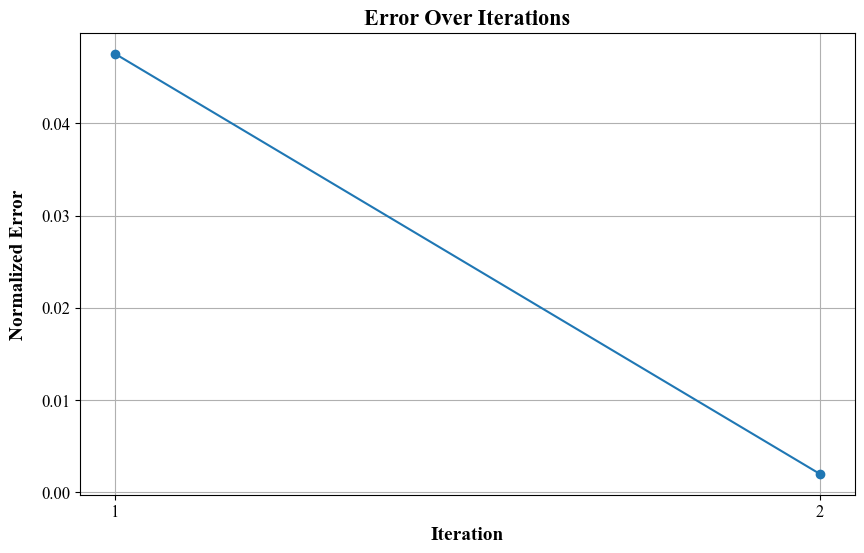

In [66]:
### This cell will call Furness function and store final trip table in the new variable
### You need to finish all previous steps before running this cell! 
solution_Furness = Furness(dist, f_origin, f_destination, tolerance = 0.01)


In [67]:
### This cell calculate differences between two models for each OD-pair
difference = solution_gravity_model - solution_Furness

In [68]:
print(difference)

             Zone 1  Zone 2  Zone 3  Zone 4  Zone 5  Zone 6  Zone 7  Zone 8  Zone 9  Zone 10  \
Zone 1       -0.061  -0.548  -0.742  -0.601  -0.927  -0.921  -0.657  -0.637  -0.571   -0.914   
Zone 2       -0.292  -0.332  -0.522  -1.146  -2.079  -1.575  -1.105  -1.098  -1.283   -1.467   
Zone 3       -0.432  -0.566  -0.291  -0.626  -1.700  -2.129  -1.087  -1.022  -0.855   -1.708   
Zone 4       -0.142  -0.532  -0.259  -0.034  -0.197  -0.223  -0.026  -0.399  -0.015   -0.079   
Zone 5        0.105   0.260   0.226   0.324   0.109   0.788   0.549   0.481   0.732    1.098   
Zone 6        0.084   0.148   0.219   0.296   0.718   0.208   0.595   0.514   0.582    0.922   
Zone 7        0.313   0.653   0.633   0.630   1.148   1.353   0.189   0.687   0.685    1.250   
Zone 8       -0.138  -0.460  -0.382  -0.388  -0.247  -0.324  -0.027  -0.065  -0.017   -0.063   
Zone 9        0.339   0.952   0.621   1.035   1.722   1.493   0.769   1.080   0.314    0.750   
Zone 10       0.221   0.425   0.498   0.

## Discussion Question
Discuss performance of two models in 1-2 setntences. What are errors of both methods, which one perform better in your opinon? How many itterations it took to converge for each function?

xxxxx
add your discussion here
xxxxx

From the perspective of error, the Gravity method produces smaller errors, indicating that its performance is better than the Furness method. However, compared with `Gravity` method, `Furness` method requires fewer number of itinerations, only 2, while the number for `Gravity` is 4.


## Practical Assignment

i. Run both models with error = 0.0001 and discuss performance of both models

ii. Run both models with error = 0.00001 and discuss performance of both models

In [69]:
practice_gravity1 = gravity_model(
    f_origin,  # Origin matrix
    f_destination,  # Destination matrix
    dist,  # Cost matrix
    dist,  # Deterrence matrix
    error_threshold = 0.0001,  # Error threshold for stopping condition
    improvement_threshold = 1e-4)  # Improvement threshold for stopping condition


Initial Cost Matrix:
          Zone 1  Zone 2  Zone 3  Zone 4  Zone 5  Zone 6  Zone 7  Zone 8  Zone 9  Zone 10
Zone 1      2.9     7.6    12.2    11.3    12.4     9.7    17.0    10.4    13.6     16.3
Zone 2      7.6     2.6     4.8    11.3    13.5     8.1    12.8     9.3    13.5     12.0
Zone 3     12.2     4.8     2.9     6.7    12.0    11.9    13.7     9.4     9.8     15.2
Zone 4     11.3    11.3     6.7     1.3     9.1     7.7     9.8    14.3    12.2     10.1
Zone 5     12.4    13.5    12.0     9.1     1.3     7.6     8.6    10.7    10.0     13.2
Zone 6      9.7     8.1    11.9     7.7     7.6     1.8     8.2    10.5     7.0      9.8
Zone 7     17.0    12.8    13.7     9.8     8.6     8.2     2.0     8.7     6.4     10.0
Zone 8     10.4     9.3     9.4    14.3    10.7    10.5     8.7     2.2    10.4      7.3
Zone 9     13.6    13.5     9.8    12.2    10.0     7.0     6.4    10.4     2.3      4.7
Zone 10    16.3    12.0    15.2    10.1    13.2     9.8    10.0     7.3     4.7      2.0

In [70]:
practice_gravity2 = gravity_model(
    f_origin,  # Origin matrix
    f_destination,  # Destination matrix
    dist,  # Cost matrix
    dist,  # Deterrence matrix
    error_threshold = 0.00001,  # Error threshold for stopping condition
    improvement_threshold = 1e-4)  # Improvement threshold for stopping condition


Initial Cost Matrix:
          Zone 1  Zone 2  Zone 3  Zone 4  Zone 5  Zone 6  Zone 7  Zone 8  Zone 9  Zone 10
Zone 1      2.9     7.6    12.2    11.3    12.4     9.7    17.0    10.4    13.6     16.3
Zone 2      7.6     2.6     4.8    11.3    13.5     8.1    12.8     9.3    13.5     12.0
Zone 3     12.2     4.8     2.9     6.7    12.0    11.9    13.7     9.4     9.8     15.2
Zone 4     11.3    11.3     6.7     1.3     9.1     7.7     9.8    14.3    12.2     10.1
Zone 5     12.4    13.5    12.0     9.1     1.3     7.6     8.6    10.7    10.0     13.2
Zone 6      9.7     8.1    11.9     7.7     7.6     1.8     8.2    10.5     7.0      9.8
Zone 7     17.0    12.8    13.7     9.8     8.6     8.2     2.0     8.7     6.4     10.0
Zone 8     10.4     9.3     9.4    14.3    10.7    10.5     8.7     2.2    10.4      7.3
Zone 9     13.6    13.5     9.8    12.2    10.0     7.0     6.4    10.4     2.3      4.7
Zone 10    16.3    12.0    15.2    10.1    13.2     9.8    10.0     7.3     4.7      2.0

Original OD Matrix:
             Zone 1  Zone 2  Zone 3  Zone 4  Zone 5  Zone 6  Zone 7  Zone 8  Zone 9  Zone 10  \
Zone 1          2.9     7.6    12.2    11.3    12.4     9.7    17.0    10.4    13.6     16.3   
Zone 2          7.6     2.6     4.8    11.3    13.5     8.1    12.8     9.3    13.5     12.0   
Zone 3         12.2     4.8     2.9     6.7    12.0    11.9    13.7     9.4     9.8     15.2   
Zone 4         11.3    11.3     6.7     1.3     9.1     7.7     9.8    14.3    12.2     10.1   
Zone 5         12.4    13.5    12.0     9.1     1.3     7.6     8.6    10.7    10.0     13.2   
Zone 6          9.7     8.1    11.9     7.7     7.6     1.8     8.2    10.5     7.0      9.8   
Zone 7         17.0    12.8    13.7     9.8     8.6     8.2     2.0     8.7     6.4     10.0   
Zone 8         10.4     9.3     9.4    14.3    10.7    10.5     8.7     2.2    10.4      7.3   
Zone 9         13.6    13.5     9.8    12.2    10.0     7.0     6.4    10.4     2.3      4.7   
Zone 10        16.3 

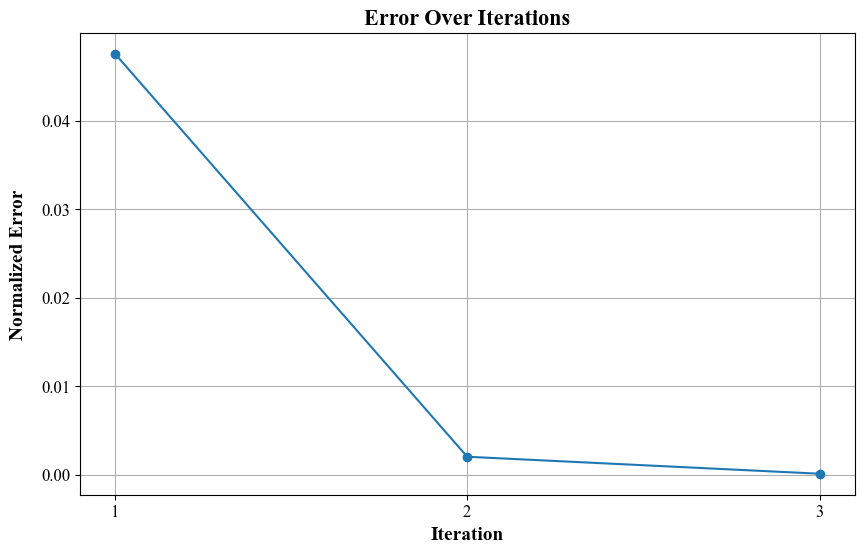

In [71]:
practice_furness1 = Furness(
    dist,f_origin,f_destination,tolerance=0.0001
)

Original OD Matrix:
             Zone 1  Zone 2  Zone 3  Zone 4  Zone 5  Zone 6  Zone 7  Zone 8  Zone 9  Zone 10  \
Zone 1          2.9     7.6    12.2    11.3    12.4     9.7    17.0    10.4    13.6     16.3   
Zone 2          7.6     2.6     4.8    11.3    13.5     8.1    12.8     9.3    13.5     12.0   
Zone 3         12.2     4.8     2.9     6.7    12.0    11.9    13.7     9.4     9.8     15.2   
Zone 4         11.3    11.3     6.7     1.3     9.1     7.7     9.8    14.3    12.2     10.1   
Zone 5         12.4    13.5    12.0     9.1     1.3     7.6     8.6    10.7    10.0     13.2   
Zone 6          9.7     8.1    11.9     7.7     7.6     1.8     8.2    10.5     7.0      9.8   
Zone 7         17.0    12.8    13.7     9.8     8.6     8.2     2.0     8.7     6.4     10.0   
Zone 8         10.4     9.3     9.4    14.3    10.7    10.5     8.7     2.2    10.4      7.3   
Zone 9         13.6    13.5     9.8    12.2    10.0     7.0     6.4    10.4     2.3      4.7   
Zone 10        16.3 

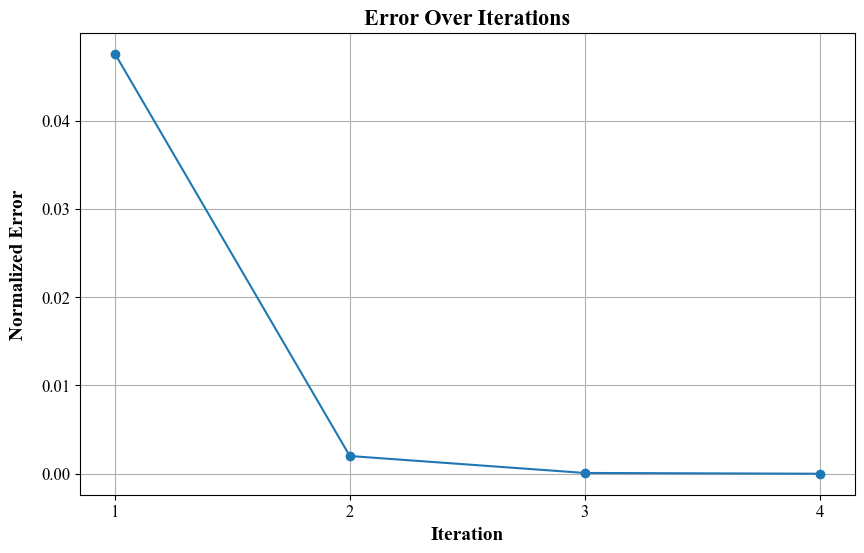

In [72]:
practice_furness2 = Furness(
    dist,f_origin,f_destination,tolerance=0.00001
)

In [73]:
diff1 = practice_gravity1 - practice_furness1
diff1


,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6,Zone 7,Zone 8,Zone 9,Zone 10,Origin
Zone 1,-0.003,-0.023,-0.031,-0.026,-0.041,-0.040,-0.028,-0.026,-0.024,-0.037,-0.280
Zone 2,-0.012,-0.013,-0.021,-0.048,-0.086,-0.065,-0.045,-0.044,-0.051,-0.058,-0.443
Zone 3,-0.017,-0.023,-0.012,-0.026,-0.070,-0.087,-0.043,-0.040,-0.034,-0.066,-0.416
Zone 4,-0.007,-0.026,-0.012,-0.002,-0.014,-0.016,-0.005,-0.021,-0.005,-0.007,-0.115
Zone 5,0.002,0.003,0.004,0.008,0.003,0.023,0.018,0.014,0.025,0.037,0.141
Zone 6,0.001,0.000,0.001,0.006,0.019,0.006,0.018,0.014,0.019,0.029,0.113
Zone 7,0.013,0.027,0.026,0.025,0.046,0.054,0.008,0.029,0.028,0.052,0.310
Zone 8,-0.004,-0.013,-0.011,-0.009,-0.002,-0.003,0.004,-0.001,0.007,0.005,-0.028
Zone 9,0.016,0.043,0.028,0.045,0.074,0.065,0.034,0.049,0.014,0.034,0.401
Zone 10,0.012,0.024,0.028,0.026,0.071,0.065,0.039,0.024,0.020,0.010,0.319


In [74]:
diff2 = practice_gravity2 - practice_furness2
diff2

,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6,Zone 7,Zone 8,Zone 9,Zone 10,Origin
Zone 1,0.000,-0.001,-0.001,-0.001,-0.002,-0.002,-0.001,-0.002,-0.002,-0.001,-0.013
Zone 2,-0.001,0.000,-0.001,-0.002,-0.004,-0.003,-0.002,-0.002,-0.003,-0.002,-0.020
Zone 3,-0.001,-0.001,-0.001,-0.001,-0.003,-0.004,-0.002,-0.002,-0.001,-0.003,-0.020
Zone 4,-0.001,-0.001,0.000,0.000,-0.001,-0.001,0.000,-0.002,0.000,-0.001,-0.006
Zone 5,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.001,0.001,0.005
Zone 6,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.001,0.004
Zone 7,0.000,0.001,0.001,0.001,0.002,0.003,0.000,0.001,0.001,0.003,0.014
Zone 8,-0.001,0.000,-0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000
Zone 9,0.000,0.002,0.001,0.002,0.003,0.004,0.002,0.002,0.001,0.001,0.020
Zone 10,0.001,0.001,0.001,0.001,0.003,0.003,0.002,0.001,0.001,0.000,0.016


xxxx
i. add your discussion here
xxxx

When the error tolerance is set to 0.0001, the difference becomes smaller compared with the previous case. Under this stricter tolerance, the number of iterations required by the Furness method increases, while the number of iterations required by the Gravity method decreases.

xxxx
ii. add your discussion here
xxxx

When the error tolerance is further reduced to 0.00001, the difference becomes even smaller. As a result, the number of iterations required increases further, since both methods must generate to a more precise solution.


# To submit your homework:

    1 - Run all code cells 

    2 - Answer all questions

    3 - Download as pdf (you can use print the page and save it as pdf)  

    4 - Inspect the pdf file (all cells are executed and all questions are answered?)

    5 - If it looks good

            - Rename it as following *WA6_first_last* replacing *first_last* with your first and last names
    
            - Upload pdf to UBLearns/BrightSpace
    
        else
    
            - Fix the issue
    
            - Repeat from step 3
    

<div class="alert alert-block alert-info">
<b>Tip:</b> you may need to install additional libriaries to enable download into pdf funciton using pip and command window, specifically: >pyppeteer-install and/or nbconvert[webpdf].
</div>